# <span style="color:red;">**CUSTOMER SEGMENTATİON**</span>


## <span style="color:red;">**Import Dataset**</span>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import plotly.express as px # charts plotting
import plotly.graph_objects as go # more customized plotting

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## <span style="color:red;">**Read Dataset**</span>

In [2]:
train_df = pd.read_csv("Train.csv")
test_df = pd.read_csv("Test.csv")

In [3]:
df0 = pd.concat([train_df, test_df])
df = df0.copy()
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.000,Low,4.000,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.000,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.000,Low,1.000,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.000,High,2.000,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.000,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.000,Low,4.000,Cat_6,B
2623,467958,Female,No,35,Yes,Doctor,1.000,Low,1.000,Cat_6,A
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.000,Cat_6,C
2625,467961,Male,Yes,47,Yes,Executive,1.000,High,5.000,Cat_4,C


<h2 style="text-align: center; color: red;">Customer Segmentation Dataset Variables</h2>

<table style="width:100%; border-collapse: collapse; text-align: center;">
  <tr style="background-color: red; color: white;">
    <th style="padding: 10px; border: 1px solid black;">Variable</th>
    <th style="padding: 10px; border: 1px solid black;">Definition</th>
  </tr>
  <tr>
    <td style="padding: 10px; border: 1px solid black;">ID</td>
    <td style="padding: 10px; border: 1px solid black;">Unique ID</td>
  </tr>
  <tr>
    <td style="padding: 10px; border: 1px solid black;">Gender</td>
    <td style="padding: 10px; border: 1px solid black;">Gender of the customer</td>
  </tr>
  <tr>
    <td style="padding: 10px; border: 1px solid black;">Ever_Married</td>
    <td style="padding: 10px; border: 1px solid black;">Marital status of the customer</td>
  </tr>
  <tr>
    <td style="padding: 10px; border: 1px solid black;">Age</td>
    <td style="padding: 10px; border: 1px solid black;">Age of the customer</td>
  </tr>
  <tr>
    <td style="padding: 10px; border: 1px solid black;">Graduated</td>
    <td style="padding: 10px; border: 1px solid black;">Is the customer a graduate?</td>
  </tr>
  <tr>
    <td style="padding: 10px; border: 1px solid black;">Profession</td>
    <td style="padding: 10px; border: 1px solid black;">Profession of the customer</td>
  </tr>
  <tr>
    <td style="padding: 10px; border: 1px solid black;">Work_Experience</td>
    <td style="padding: 10px; border: 1px solid black;">Work Experience in years</td>
  </tr>
  <tr>
    <td style="padding: 10px; border: 1px solid black;">Spending_Score</td>
    <td style="padding: 10px; border: 1px solid black;">Spending score of the customer</td>
  </tr>
  <tr>
    <td style="padding: 10px; border: 1px solid black;">Family_Size</td>
    <td style="padding: 10px; border: 1px solid black;">Number of family members for the customer (including the customer)</td>
  </tr>
  <tr>
    <td style="padding: 10px; border: 1px solid black;">Var_1</td>
    <td style="padding: 10px; border: 1px solid black;">Anonymised Category for the customer</td>
  </tr>
  <tr>
    <td style="padding: 10px; border: 1px solid black;">Segmentation</td>
    <td style="padding: 10px; border: 1px solid black;">(Target) Customer Segment of the customer</td>
  </tr>
</table>


## <span style="color:red;">**EDA**</span>


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10695 entries, 0 to 2626
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10695 non-null  int64  
 1   Gender           10695 non-null  object 
 2   Ever_Married     10505 non-null  object 
 3   Age              10695 non-null  int64  
 4   Graduated        10593 non-null  object 
 5   Profession       10533 non-null  object 
 6   Work_Experience  9597 non-null   float64
 7   Spending_Score   10695 non-null  object 
 8   Family_Size      10247 non-null  float64
 9   Var_1            10587 non-null  object 
 10  Segmentation     10695 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 1002.7+ KB


In [5]:
df.shape

(10695, 11)

In [6]:
df.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [7]:
df.isnull().sum()

ID                    0
Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
Segmentation          0
dtype: int64

In [8]:
numeric_list = ['Age', 'Work_Experience', 'Family_Size']
categorical_list = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score']

In [9]:
df.select_dtypes(include= "object")

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation
0,Male,No,No,Healthcare,Low,Cat_4,D
1,Female,Yes,Yes,Engineer,Average,Cat_4,A
2,Female,Yes,Yes,Engineer,Low,Cat_6,B
3,Male,Yes,Yes,Lawyer,High,Cat_6,B
4,Female,Yes,Yes,Entertainment,High,Cat_6,A
...,...,...,...,...,...,...,...
2622,Male,No,No,Healthcare,Low,Cat_6,B
2623,Female,No,Yes,Doctor,Low,Cat_6,A
2624,Female,No,Yes,Entertainment,Low,Cat_6,C
2625,Male,Yes,Yes,Executive,High,Cat_4,C


In [10]:
df.select_dtypes(include= "object").describe().T

,count,unique,top,freq
Gender,10695,2,Male,5841
Ever_Married,10505,2,Yes,6163
Graduated,10593,2,Yes,6570
Profession,10533,9,Artist,3318
Spending_Score,10695,3,Low,6494
Var_1,10587,7,Cat_6,6910
Segmentation,10695,4,D,3027


In [11]:
df["Profession"].value_counts()

Profession
Artist           3318
Healthcare       1750
Entertainment    1250
Engineer          935
Doctor            930
Lawyer            844
Executive         775
Marketing         403
Homemaker         328
Name: count, dtype: int64

In [12]:
for col in df.select_dtypes(include = "object"):
    print(col)
    print("***")
    print(df[col].value_counts())
    print("***********")

Gender
***
Gender
Male      5841
Female    4854
Name: count, dtype: int64
***********
Ever_Married
***
Ever_Married
Yes    6163
No     4342
Name: count, dtype: int64
***********
Graduated
***
Graduated
Yes    6570
No     4023
Name: count, dtype: int64
***********
Profession
***
Profession
Artist           3318
Healthcare       1750
Entertainment    1250
Engineer          935
Doctor            930
Lawyer            844
Executive         775
Marketing         403
Homemaker         328
Name: count, dtype: int64
***********
Spending_Score
***
Spending_Score
Low        6494
Average    2599
High       1602
Name: count, dtype: int64
***********
Var_1
***
Var_1
Cat_6    6910
Cat_4    1475
Cat_3    1089
Cat_2     563
Cat_7     269
Cat_1     167
Cat_5     114
Name: count, dtype: int64
***********
Segmentation
***
Segmentation
D    3027
A    2818
C    2442
B    2408
Name: count, dtype: int64
***********


In [13]:
df.loc[(df['Ever_Married'].isna()) & (df['Family_Size'] >= 2.0), 'Ever_Married'] = 'Yes'

print(df)

          ID  Gender Ever_Married  Age Graduated     Profession  \
0     462809    Male           No   22        No     Healthcare   
1     462643  Female          Yes   38       Yes       Engineer   
2     466315  Female          Yes   67       Yes       Engineer   
3     461735    Male          Yes   67       Yes         Lawyer   
4     462669  Female          Yes   40       Yes  Entertainment   
...      ...     ...          ...  ...       ...            ...   
2622  467954    Male           No   29        No     Healthcare   
2623  467958  Female           No   35       Yes         Doctor   
2624  467960  Female           No   53       Yes  Entertainment   
2625  467961    Male          Yes   47       Yes      Executive   
2626  467968  Female           No   43       Yes     Healthcare   

      Work_Experience Spending_Score  Family_Size  Var_1 Segmentation  
0               1.000            Low        4.000  Cat_4            D  
1                 NaN        Average        3.000  

In [14]:
df.loc[(df['Ever_Married'].isna()) & (df['Family_Size'] < 2.0), 'Ever_Married'] = 'No'

print(df)

          ID  Gender Ever_Married  Age Graduated     Profession  \
0     462809    Male           No   22        No     Healthcare   
1     462643  Female          Yes   38       Yes       Engineer   
2     466315  Female          Yes   67       Yes       Engineer   
3     461735    Male          Yes   67       Yes         Lawyer   
4     462669  Female          Yes   40       Yes  Entertainment   
...      ...     ...          ...  ...       ...            ...   
2622  467954    Male           No   29        No     Healthcare   
2623  467958  Female           No   35       Yes         Doctor   
2624  467960  Female           No   53       Yes  Entertainment   
2625  467961    Male          Yes   47       Yes      Executive   
2626  467968  Female           No   43       Yes     Healthcare   

      Work_Experience Spending_Score  Family_Size  Var_1 Segmentation  
0               1.000            Low        4.000  Cat_4            D  
1                 NaN        Average        3.000  

In [15]:
df.isnull().sum()

ID                    0
Gender                0
Ever_Married         14
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
Segmentation          0
dtype: int64

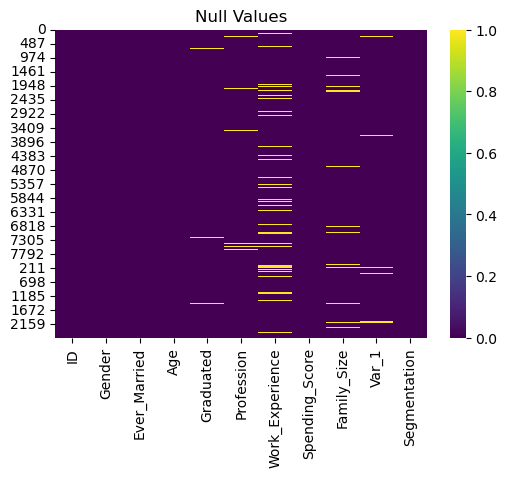

In [16]:
# Null values heatmap:
plt.figure(figsize = (6,4))
sns.heatmap(df.isnull(), cmap='viridis')
plt.title('Null Values')
plt.show()

In [17]:
# dropping the rows having NaN values
df = df.dropna()

In [18]:
df.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8962 entries, 0 to 2626
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8962 non-null   int64  
 1   Gender           8962 non-null   object 
 2   Ever_Married     8962 non-null   object 
 3   Age              8962 non-null   int64  
 4   Graduated        8962 non-null   object 
 5   Profession       8962 non-null   object 
 6   Work_Experience  8962 non-null   float64
 7   Spending_Score   8962 non-null   object 
 8   Family_Size      8962 non-null   float64
 9   Var_1            8962 non-null   object 
 10  Segmentation     8962 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 840.2+ KB


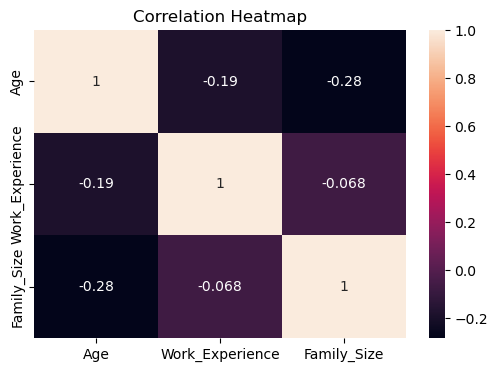

In [20]:
# Correlation heatmap
plt.figure(figsize = (6,4))
sns.heatmap(df[numeric_list].corr(), annot = True)
plt.title('Correlation Heatmap')
plt.show()

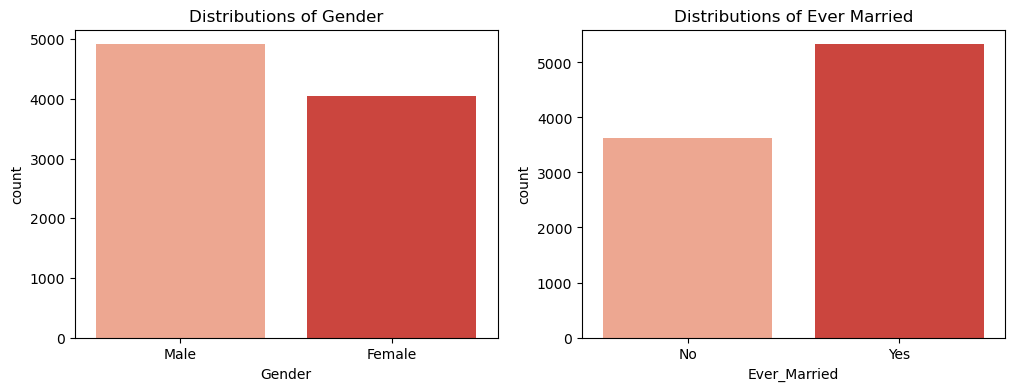

In [27]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.countplot(x=df['Gender'], palette='Reds')
plt.title("Distributions of Gender")

plt.subplot(1,2,2)
sns.countplot(x=df['Ever_Married'], palette='Reds')
plt.title("Distributions of Ever Married")
plt.show()

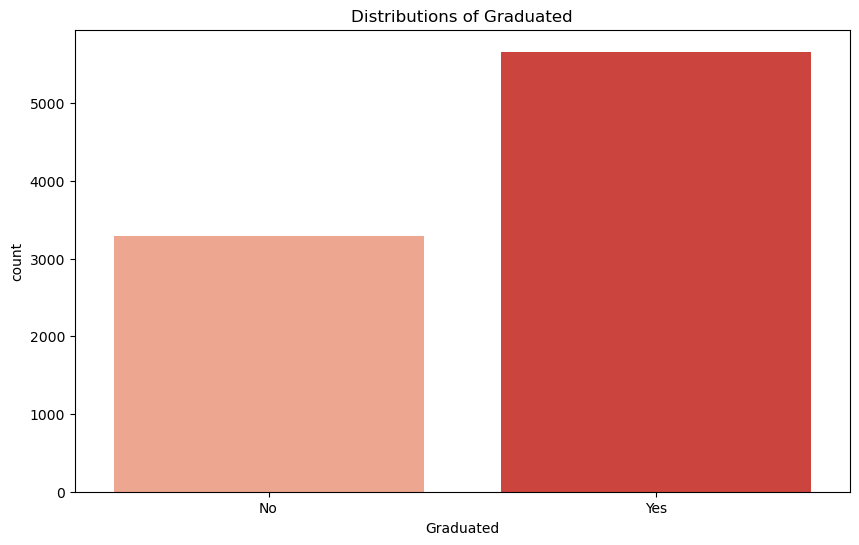

In [25]:
sns.countplot(x=df['Graduated'], palette='Reds')
plt.title("Distributions of Graduated")
plt.show()

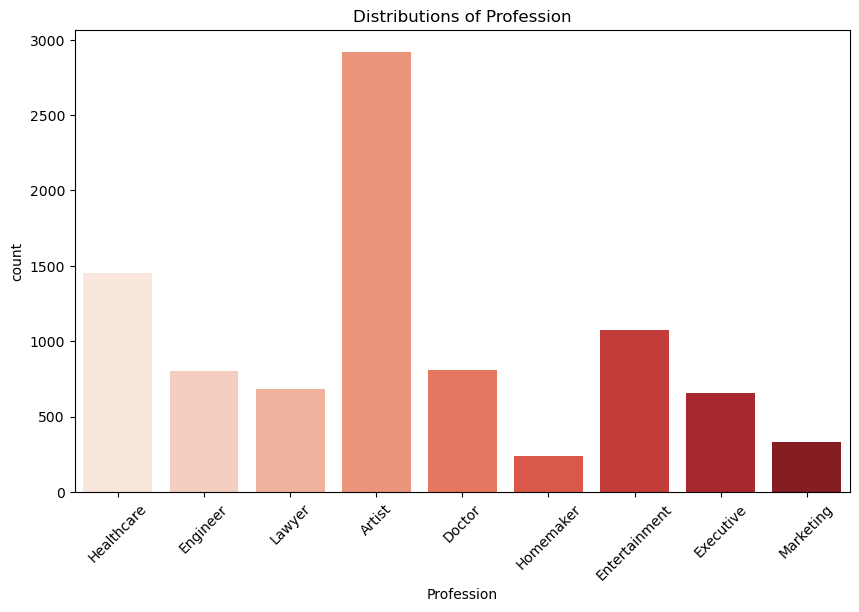

In [24]:
sns.countplot(x=df['Profession'], palette='Reds') 
plt.title("Distributions of Profession")
plt.xticks(rotation=45)
plt.show()

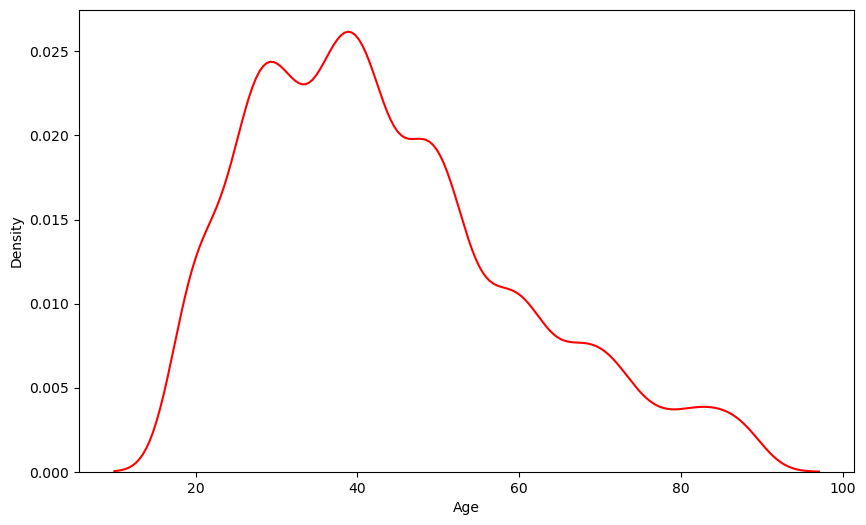

In [29]:
sns.kdeplot(df['Age'], color='red') 
plt.show()

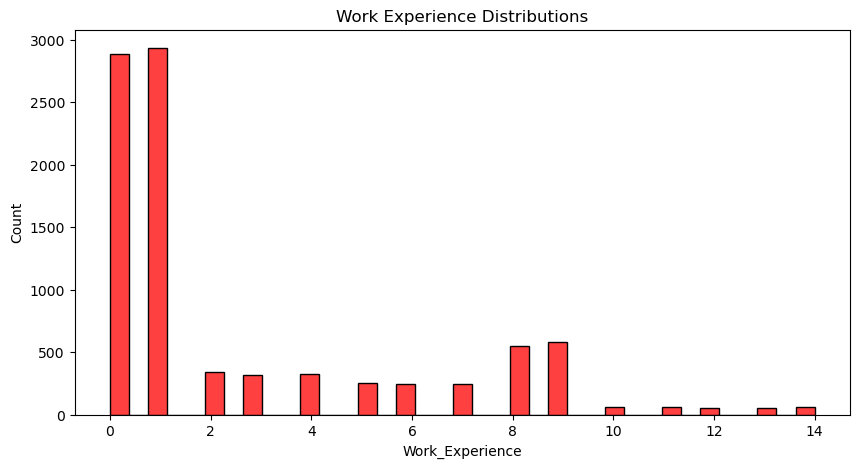

In [32]:
plt.figure(figsize=(10,5))
sns.histplot(df['Work_Experience'], color='red')
plt.title("Work Experience Distributions")
plt.show()

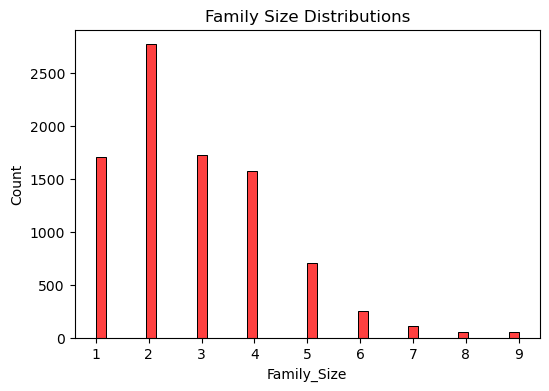

In [33]:
plt.figure(figsize=(6,4))
sns.histplot(df['Family_Size'], color="red")
plt.title("Family Size Distributions")
plt.show()

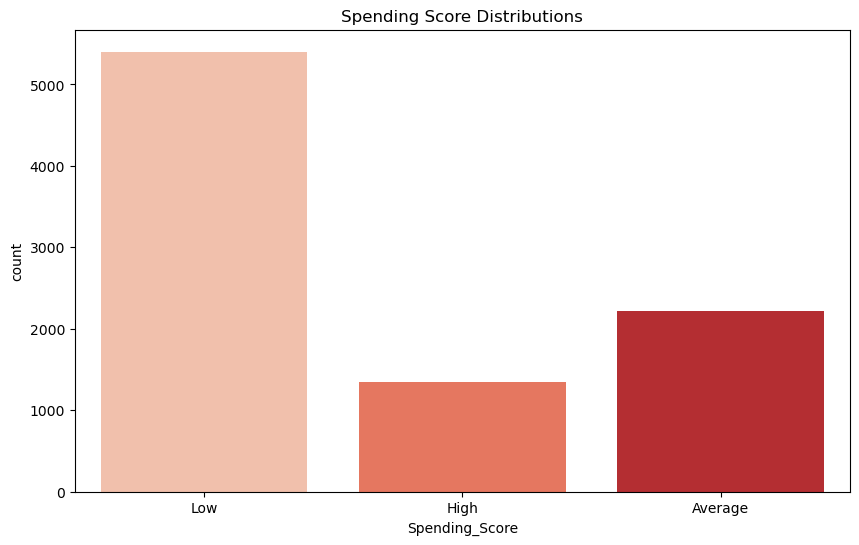

In [35]:
sns.countplot(x=df['Spending_Score'], palette='Reds')
plt.title("Spending Score Distributions")
plt.show()

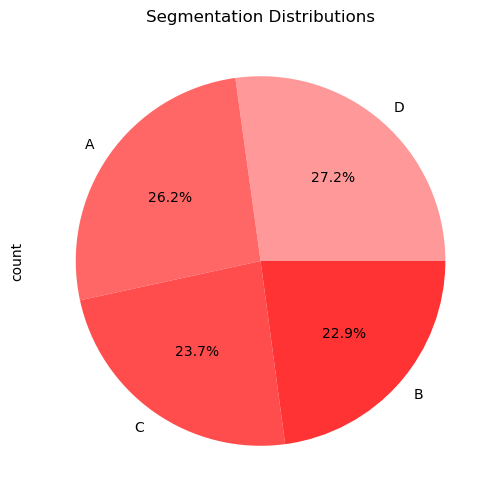

In [36]:
colors = ['#ff9999', '#ff6666', '#ff4d4d', '#ff3333']  

df['Segmentation'].value_counts().plot(kind="pie", autopct="%.1f%%", colors=colors) 
plt.title("Segmentation Distributions")
plt.show()

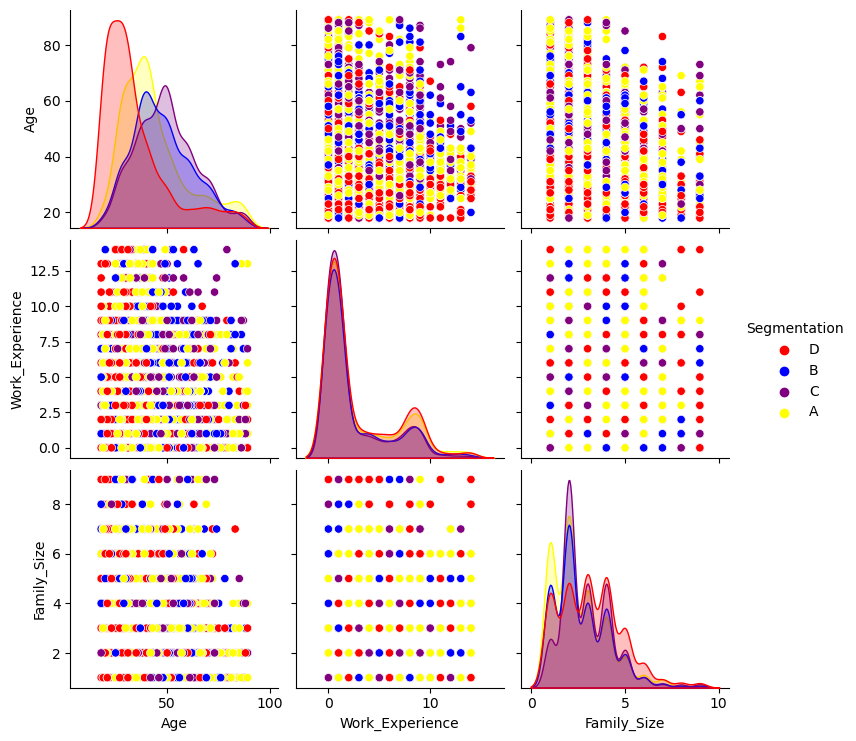

In [38]:
sns.pairplot(data=df[['Age', 'Graduated', 'Work_Experience', 'Family_Size',
       'Segmentation']],hue='Segmentation',palette=['Red','Blue','Purple','Yellow']);
plt.show()